In [17]:
%cd datasets/dataset5

/home/think3/Desktop/test_yolo/datasets/dataset5


In [18]:
import os

# the path that has all images
path = "images"

# Get the number of files in the directory
num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and not f.startswith('.')])

print("Number of files in directory:", num_files)

Number of files in directory: 7534


In [19]:
# Get the indices based on the files' number
indices = list(range(num_files))

In [31]:
classes = []

In [32]:
for i in os.listdir(path):
    class_name = i.split('.')[0].split('_')[0] +'_'+  i.split('.')[0].split('_')[1]
    if class_name == "Teh_Marbuta" and class_name not in classes:
        classes.append(class_name)
    elif i.split('.')[0].split('_')[0] not in classes:
        classes.append(i.split('.')[0].split('_')[0])
classes, len(classes)

(['Zain',
  'Meem',
  'Zah',
  'Khah',
  'Sheen',
  'Waw',
  'Qaf',
  'Theh',
  'Tah',
  'Teh_Marbuta',
  'Beh',
  'Dad',
  'Kaf',
  'Al',
  'thal',
  'Noon',
  'Teh',
  'Ain',
  'Yeh',
  'Sad',
  'Feh',
  'Dal',
  'Seen',
  'Alef',
  'Jeem',
  'Lam',
  'Laa',
  'Reh',
  'Ghain',
  'Heh',
  'Hah'],
 31)

In [41]:
for clas in classes:
    if not os.path.exists(os.path.join('classes',clas)):
        os.makedirs(os.path.join('classes',clas))

In [32]:
import shutil

In [43]:
# Create folders based on the classes names
# Copy the images to the folder based on the class name
for i in os.listdir(path):
    
    check = i.split('.')[0].split('_')[0] +'_'+  i.split('.')[0].split('_')[1]
    
    if check == "Teh_Marbuta":
        shutil.copy(os.path.join(path, i), os.path.join('classes',os.path.join(check, i)))
    elif i.split('.')[0].split('_')[0]:
        shutil.copy(os.path.join(path, i),  os.path.join('classes', os.path.join(i.split('.')[0].split('_')[0], i)))

In [60]:
targets = ["Ain"
,"Al"
,"Alef"
,"Beh"
,"Dad"
,"Dal"
,"Feh"
,"Ghain"
,"Hah"
,"Heh"
,"Jeem"
,"Kaf"
,"Khah"
,"Laa"
,"Lam"
,"Meem"
,"Noon"
,"Qaf"
,"Reh"
,"Sad"
,"Seen"
,"Sheen"
,"Tah"
,"Teh"
,"Teh_Marbuta"
,"thal"
,"Theh"
,"Waw"
,"Yeh"
,"Zah"
,"Zain"]


In [72]:
targets

['Ain',
 'Al',
 'Alef',
 'Beh',
 'Dad',
 'Dal',
 'Feh',
 'Ghain',
 'Hah',
 'Heh',
 'Jeem',
 'Kaf',
 'Khah',
 'Laa',
 'Lam',
 'Meem',
 'Noon',
 'Qaf',
 'Reh',
 'Sad',
 'Seen',
 'Sheen',
 'Tah',
 'Teh',
 'Teh_Marbuta',
 'thal',
 'Theh',
 'Waw',
 'Yeh',
 'Zah',
 'Zain']

In [74]:
!pwd

/home/think3/Desktop/test_yolo/datasets/dataset5


In [75]:
targets_indx = []

In [76]:
for i, cls in enumerate(targets):
    print(cls)
    num = len(os.listdir(os.path.join('classes', cls)))
    print(num)
    indices_cls = [i] * num
    targets_indx= targets_indx + indices_cls

Ain
244
Al
268
Alef
280
Beh
299
Dad
259
Dal
229
Feh
250
Ghain
225
Hah
238
Heh
247
Jeem
202
Kaf
250
Khah
242
Laa
259
Lam
233
Meem
246
Noon
229
Qaf
197
Reh
218
Sad
261
Seen
231
Sheen
265
Tah
216
Teh
300
Teh_Marbuta
248
thal
196
Theh
291
Waw
232
Yeh
266
Zah
223
Zain
190


In [78]:
#targets_indx

In [81]:
import torch

In [83]:
!pip list

Package                  Version             
------------------------ --------------------
absl-py                  1.4.0               
asttokens                2.2.1               
backcall                 0.2.0               
cachetools               5.3.0               
certifi                  2022.12.7           
chardet                  4.0.0               
charset-normalizer       3.0.1               
comm                     0.1.3               
contourpy                1.0.7               
cycler                   0.10.0              
debugpy                  1.6.6               
decorator                5.1.1               
executing                1.2.0               
fonttools                4.38.0              
gitdb                    4.0.10              
GitPython                3.1.31              
google-auth              2.16.1              
google-auth-oauthlib     0.4.6               
grpcio                   1.51.3              
idna                     2.10     

In [ ]:
!pip install torchvision

In [4]:
#!pip install torchvision
import torchvision


dataset = torchvision.datasets.ImageFolder(root = "/home/think3/Desktop/test_yolo/datasets/dataset5/classes")
# print(dataset.transform)
print(dataset)

Dataset ImageFolder
    Number of datapoints: 7534
    Root location: /home/think3/Desktop/test_yolo/datasets/dataset5/classes


In [ ]:
#!pip install scikit-learn

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

In [20]:
# Data splitting 
# Split the data into training, validation and testing 

X_train, X_test = train_test_split(indices, test_size=0.3, random_state=42 , stratify = dataset.targets , shuffle = True)
X_test_classes = [dataset.targets[i]  for i in X_test ]
X_test_after , X_validation = train_test_split(X_test, test_size=0.5, random_state=42,  stratify = X_test_classes , shuffle = True)

In [21]:
import torch

In [22]:
#Create subset from  the splitted indices
traindata = torch.utils.data.Subset(dataset, indices=X_train)
valdata   = torch.utils.data.Subset(dataset, indices=X_validation)
testdata  = torch.utils.data.Subset(dataset, indices=X_test_after)

In [23]:
#Check a sample from the data
for i in traindata.indices:
    print(i)
    print(traindata.dataset.samples[i][0])
    break

1163
/home/think3/Desktop/test_yolo/datasets/dataset5/classes/Dad/Dad_167_jpg.rf.748a3419a1d7694980ab97bf7811a834.jpg


In [24]:
# Extract the images' path for each subset
train_image_paths = [traindata.dataset.samples[i][0] for i in traindata.indices]
val_image_paths = [valdata.dataset.samples[i][0] for i in valdata.indices]
test_image_paths = [testdata.dataset.samples[i][0] for i in testdata.indices]

In [25]:
# Print the image length for each subset
print("Training image length:", len(train_image_paths))
print("Validation image length:", len(val_image_paths))
print("Testing image length:", len(test_image_paths))

Training image length: 5273
Validation image length: 1131
Testing image length: 1130


In [38]:
# # # Print the image paths for each subset
# print("Training image paths:", train_image_paths)
# print("Validation image paths:", val_image_paths)
# print("Testing image paths:", test_image_paths)

In [36]:
for item in ['train', 'valid', 'test']:
    for lab in ['images', 'labels']:
        if not os.path.exists(f'/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/{item}/{lab}'):
            os.makedirs(os.path.join(f'/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/{item}/{lab}'))

In [38]:
for img_path in train_image_paths:
    shutil.copy(img_path, "/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/train/images")

In [39]:
for img_path in val_image_paths:
    shutil.copy(img_path, "/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/valid/images")

In [40]:
for img_path in test_image_paths:
    shutil.copy(img_path, "/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/test/images")

In [44]:
for item in os.listdir("/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/train/images"):
    #print(''.join(item.split('.')[:-1]))
    img_name = '.'.join(item.split('.')[:-1]) + '.txt'
    #print(img_name)
    label_path = os.path.join("/home/think3/Desktop/test_yolo/datasets/dataset5/labels", img_name)
    #print(os.path.isfile(label_path))
    shutil.copy(label_path, "/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/train/labels")

Meem_178_jpg.rf.fd3c4599e431103f72a100eada61f04a.txt
True
Zain_21_jpg.rf.234587a86d008972d43cd0d15ae59da2.txt
True
Zah_67_jpg.rf.0938ff2dad3cf65188098f738f5a9dc2.txt
True
Khah_35_jpg.rf.968e86c197ae8408612899d5003ad159.txt
True
Sheen_24_jpg.rf.498020a0789314f576b3946223826aff.txt
True
Waw_34_jpg.rf.db2951a5f628dc1509d79bfdf4353006.txt
True
Theh_209_jpg.rf.9c1c2e555994c7c452210b992e813947.txt
True
Dad_42_jpg.rf.a8d3c5de6e100a3a630c44176a2bfaa6.txt
True
Sheen_268_jpg.rf.a440abf30edefdb997eb9400958a07ba.txt
True
Kaf_253_jpg.rf.146050121b28c8c6148aa5e75f205789.txt
True
Kaf_33_jpg.rf.cde23a687dd16ef553214cea3e58a517.txt
True
Al_124_jpg.rf.3c67012c94f81181d42a3c2b752f8f88.txt
True
thal_146_jpg.rf.4f09a31aff8832fe6b7610963e4d74a2.txt
True
Noon_234_jpg.rf.1d2fc2e2894f749ee21482840ca6e199.txt
True
Teh_Marbuta_136_jpg.rf.d079668b26641f45aef43910c936ecfc.txt
True
Ain_44_jpg.rf.8ff32dcc884212662454b162f0ed25b2.txt
True
Sad_146_jpg.rf.86b7f277291e69f02020990100fbe123.txt
True
Feh_161_jpg.rf.cc65996

Sheen_256_jpg.rf.b74423aa744eec6ef4637da84461b9af.txt
True
Jeem_115_jpg.rf.2b90c844837ff4b8e30b7233e116a429.txt
True
Zah_127_jpg.rf.b2eb1cc6eda34ebe9dedf991e3274db4.txt
True
Lam_111_jpg.rf.64b2880a45876a6cbdfd5044ec60b822.txt
True
Beh_259_jpg.rf.c67d2e8751734673811b6fef512eea82.txt
True
Tah_16_jpg.rf.8205e19e7b933259fcb32d94fb4ae30e.txt
True
Laa_131_jpg.rf.ec7f17dce393239049e6eac06f16dc68.txt
True
Yeh_191_jpg.rf.dd7a9bb0adbc23673c62437f81ba8fd0.txt
True
Heh_209_jpg.rf.cef66786cf78e595ad81f139717579ec.txt
True
Sad_98_jpg.rf.197ca36ad343d984ed81ab740c3e93c3.txt
True
Hah_140_jpg.rf.62bbdbfe3965b29f52e464729c8d35bb.txt
True
Al_214_jpg.rf.93e5695b1aa8d24a4b33ff692174052f.txt
True
Zah_112_jpg.rf.6d80aeecdca994134990e2a7d5a7900f.txt
True
Teh_Marbuta_101_jpg.rf.ca4e406a1cdbebd4b99b09c59ec46812.txt
True
Yeh_180_jpg.rf.413be64d5cf3cc3568d34b632309969e.txt
True
Noon_218_jpg.rf.9829a0041d71d43d2faf4e6a99e7bbf5.txt
True
Teh_281_jpg.rf.1680ce46d455b65a87a85466eb58f907.txt
True
Meem_112_jpg.rf.f35b1a

Seen_82_jpg.rf.9fade7d414c6da9d3a163b02d1ce8692.txt
True
Teh_61_JPG.rf.50f3d4dfa306b4fc176987ce9b749429.txt
True
Dad_81_jpg.rf.0d20c6e7b50af63c070bde77325751af.txt
True
Meem_97_jpg.rf.1c1c830f450862b674150a0a4b5ded67.txt
True
Teh_254_jpg.rf.6631f915b81e27daf4ac8caceba0b230.txt
True
Teh_122_jpg.rf.ffe32da4545186d19cbca3fb43c7bce5.txt
True
Ain_141_jpg.rf.b53c959ff1aa0e801130040a5a25e5fb.txt
True
Laa_251_jpg.rf.ff5a01f90fef41b4ae4b20769e0fb9af.txt
True
Beh_220_jpg.rf.c976788ed932e95885214928eaebcd0e.txt
True
Beh_224_jpg.rf.c168399ed435b9a94decdddcc3ef188e.txt
True
Qaf_85_jpg.rf.3eb607cb0b7b12a1515a54fc4f0d7415.txt
True
Laa_12_jpg.rf.a6a1ee623b3abcd251657e97a9c6ec01.txt
True
Ain_176_jpg.rf.98328ebd08ac543dde3bc8dc714d60c0.txt
True
Hah_147_jpg.rf.ecd47362641a7243822ddd3cdf391e79.txt
True
Noon_100_jpg.rf.e2196de82ce981aa063c7121a9d284d5.txt
True
thal_59_jpg.rf.950225859b001867fd0a04c91433a9e9.txt
True
Laa_50_jpg.rf.08a659ebe75f8f376fd123d808b90340.txt
True
Qaf_188_jpg.rf.af2158b4b095cf5ad38b

Beh_113_jpg.rf.c256bb3357b1c3c93236d64527d5679c.txt
True
Zain_194_jpg.rf.2ba930bdd60a6423ff80c8eecb5786cc.txt
True
Teh_56_jpg.rf.fd628ebf009ebf3a546aed14caf5ffae.txt
True
Beh_58_jpg.rf.fbe62e86be9a30c23154274315eb6ea6.txt
True
Qaf_53_jpg.rf.446e6b9e1b27ceff8a3028796b611194.txt
True
Feh_21_jpg.rf.a2753d4a08a9a88dfd44400918e35130.txt
True
Alef_172_jpg.rf.4ebdaae09112eb95f9b646ded1953cb5.txt
True
Sheen_172_jpg.rf.c8bf5f023d1f8f36f5aaed9dba836adf.txt
True
Teh_303_jpg.rf.c1136980460a9758cfd0ea3edadf157b.txt
True
Meem_123_jpg.rf.6ee81742fbab5854f51b12abb13581eb.txt
True
Dad_126_jpg.rf.ccec56e7a438785a152d0a471c28325e.txt
True
Heh_40_jpg.rf.dc9807d8a63f7688cbc0181ae77b5802.txt
True
Hah_240_jpg.rf.5ac0dba31110aed882b660e571e96ace.txt
True
Laa_68_jpg.rf.ef00a1b622d7eb433b97c208b0192cc2.txt
True
Meem_55_jpg.rf.6b97a87e2ad9465b45caf52662bed952.txt
True
Laa_207_jpg.rf.92059b51aaaa687cfb1b14600861be24.txt
True
Theh_239_jpg.rf.0f4ea7e54ba38f1ee6f6d5de196c1896.txt
True
Heh_186_jpg.rf.9228c4d51d4cf5fc

In [45]:
for item in os.listdir("/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/valid/images"):

    img_name = '.'.join(item.split('.')[:-1]) + '.txt'

    label_path = os.path.join("/home/think3/Desktop/test_yolo/datasets/dataset5/labels", img_name)
    
    shutil.copy(label_path, "/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/valid/labels")

In [46]:
for item in os.listdir("/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/test/images"):

    img_name = '.'.join(item.split('.')[:-1]) + '.txt'

    label_path = os.path.join("/home/think3/Desktop/test_yolo/datasets/dataset5/labels", img_name)
    
    shutil.copy(label_path, "/home/think3/Desktop/test_yolo/datasets/dataset5/splitted_data/test/labels")

In [47]:
from collections import Counter

In [48]:
training_Targets = [] 
validation_Targets = [] 
testing_Targets = [] 

for i in X_train: 
  training_Targets.append(dataset.targets[i])

for i in X_validation: 
  validation_Targets.append(dataset.targets[i])

for i in X_test_after: 
  testing_Targets.append(dataset.targets[i])

In [49]:
C_training   = Counter(training_Targets) 
C_validation = Counter(validation_Targets)
C_testing    = Counter(testing_Targets)

In [50]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Label')

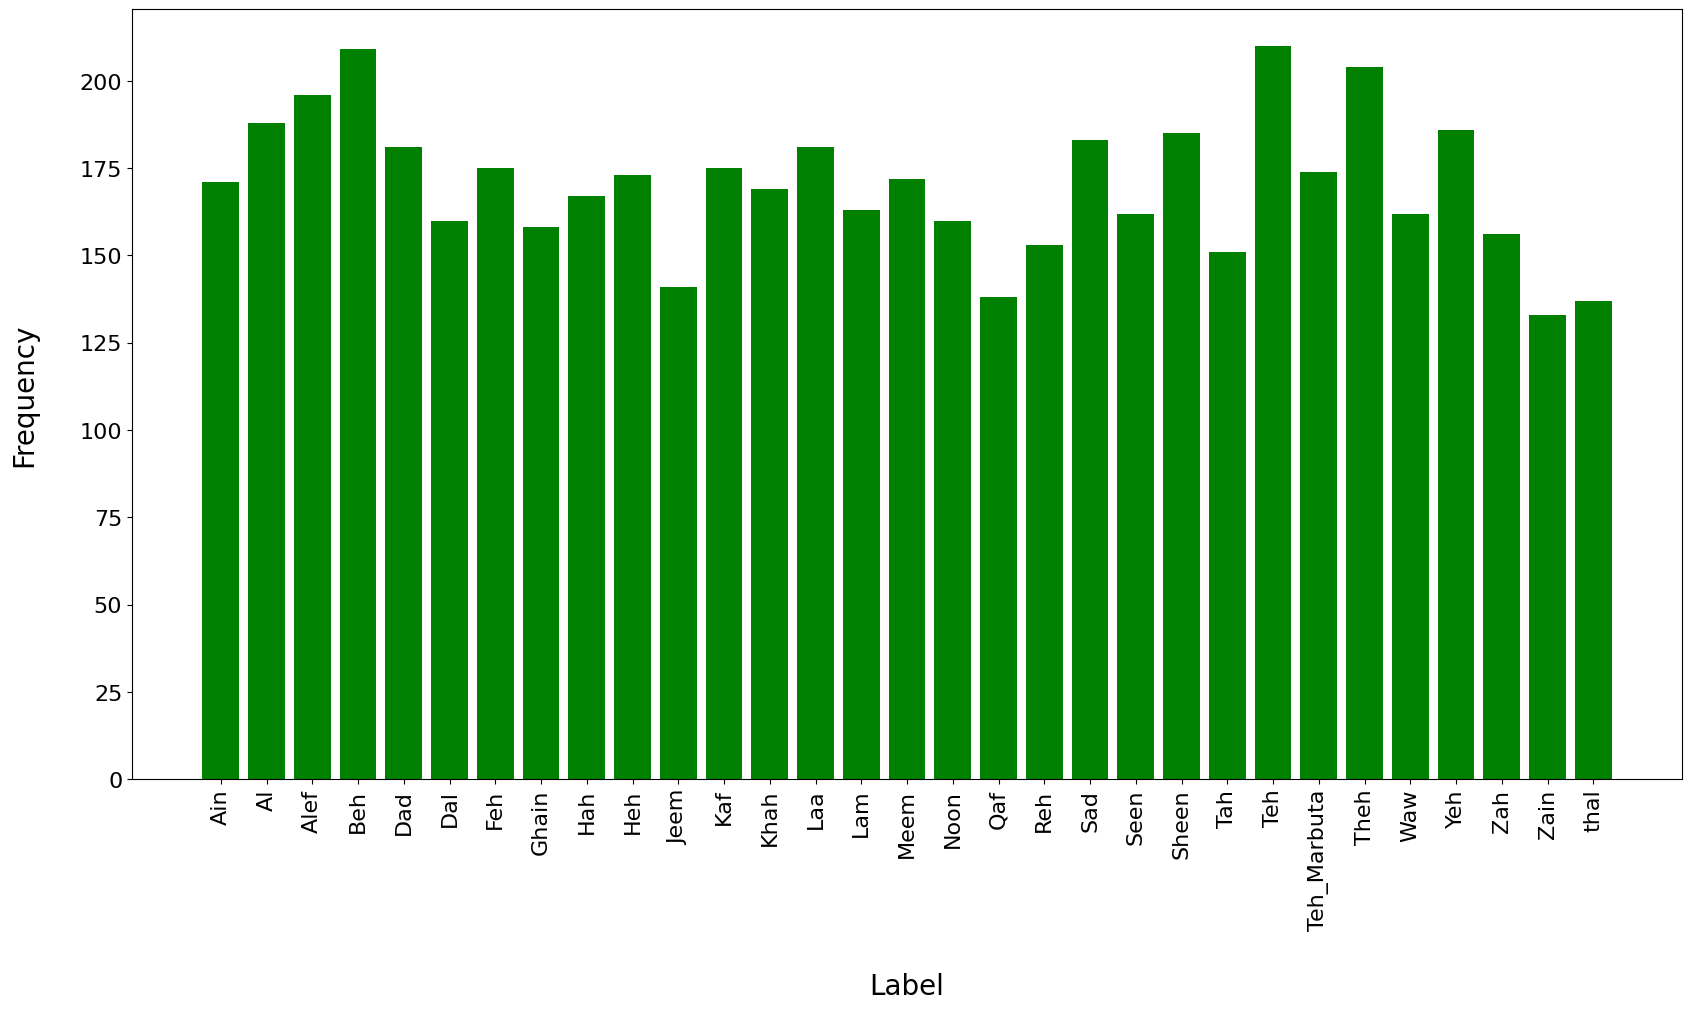

In [51]:
plt.figure(figsize=(20,10))
plt.bar(C_training.keys(), height=C_training.values(), color="green")

tick_marks = np.arange(len(dataset.classes));

plt.xticks(tick_marks, dataset.classes, fontsize=16 , rotation=90);
plt.yticks(fontsize=16);

plt.ylabel('Frequency', fontsize=20, labelpad=30)
plt.xlabel('Label', fontsize=20, labelpad=30)

Text(0.5, 0, 'Label')

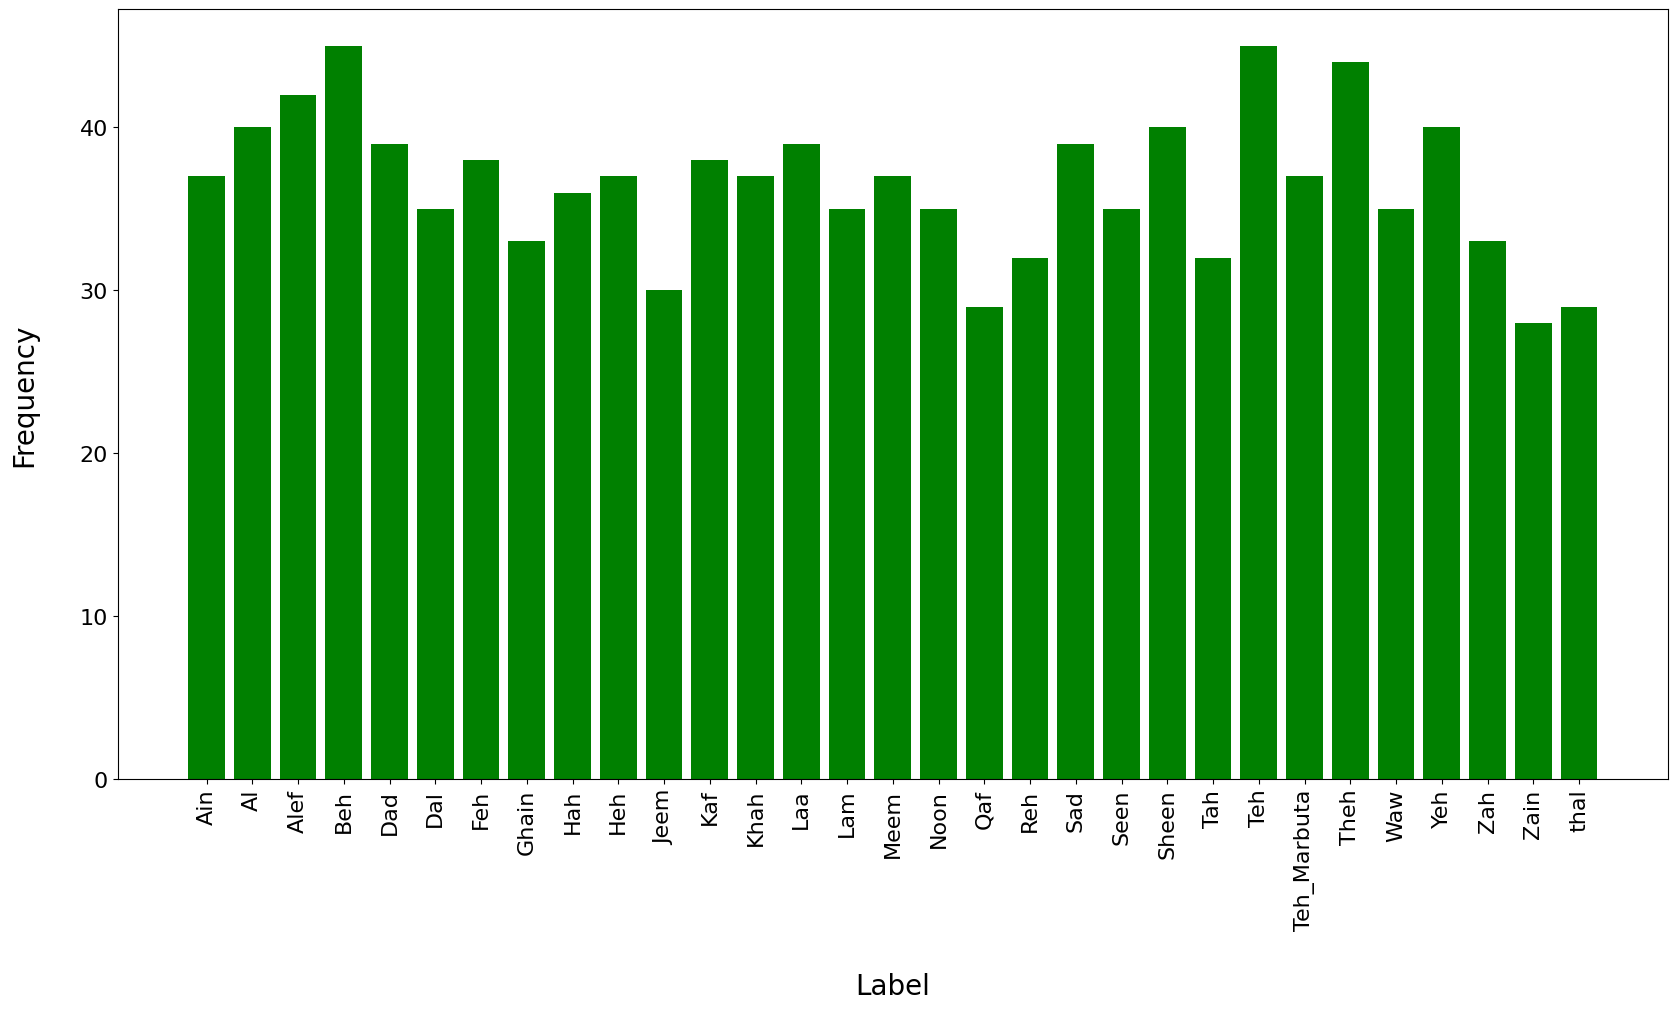

In [52]:
plt.figure(figsize=(20,10))
plt.bar(C_validation.keys(), height=C_validation.values(), color="green")

tick_marks = np.arange(len(dataset.classes));

plt.xticks(tick_marks, dataset.classes, fontsize=16 , rotation=90);
plt.yticks(fontsize=16);

plt.ylabel('Frequency', fontsize=20, labelpad=30)
plt.xlabel('Label', fontsize=20, labelpad=30)

Text(0.5, 0, 'Label')

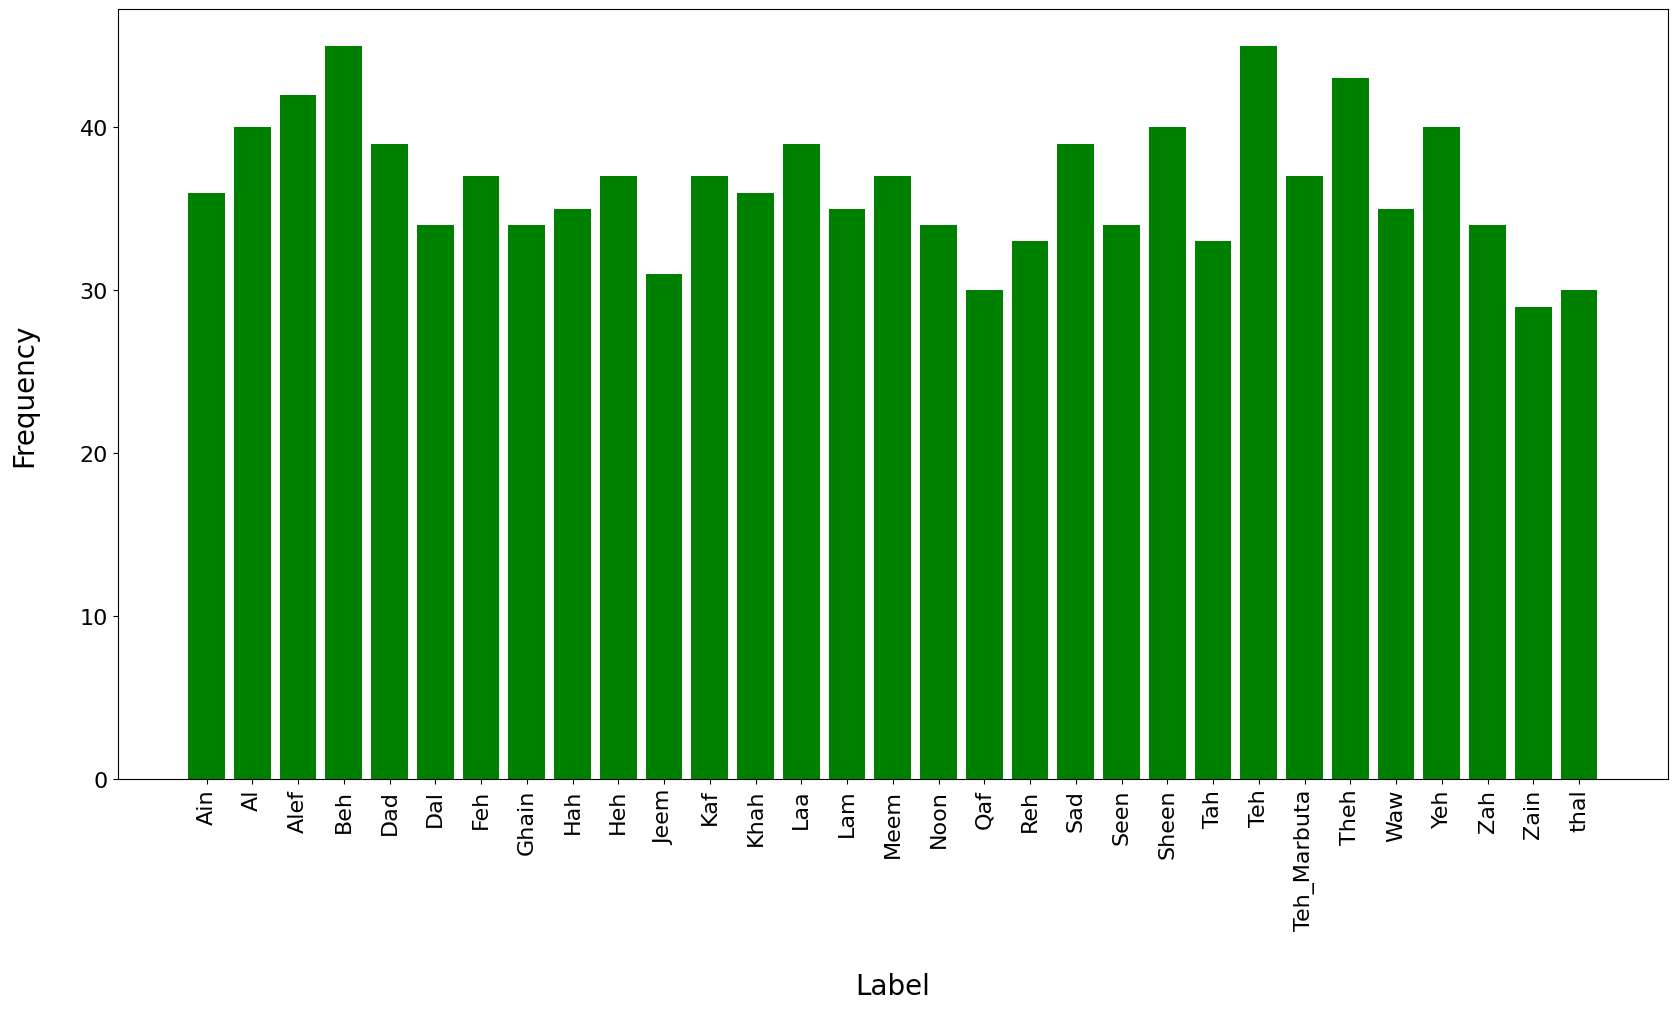

In [53]:
plt.figure(figsize=(20,10))
plt.bar(C_testing.keys(), height=C_testing.values(), color="green")

tick_marks = np.arange(len(dataset.classes));

plt.xticks(tick_marks, dataset.classes, fontsize=16 , rotation=90);
plt.yticks(fontsize=16);

plt.ylabel('Frequency', fontsize=20, labelpad=30)
plt.xlabel('Label', fontsize=20, labelpad=30)